<a href="https://colab.research.google.com/github/nabilah-nugroho/Market_Prediction_Model/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the training dataset from 'train.csv' and the test dataset from 'test.csv' into pandas DataFrames and perform an initial inspection of the data.

## Muat Data

### Subtask:
Muat dataset pelatihan ('train.csv') dan pengujian ('test.csv') ke dalam DataFrame pandas untuk inspeksi awal.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation. Then, I'll load the 'train.csv' and 'test.csv' files into two separate pandas DataFrames, `train_df` and `test_df` respectively, and display the first five rows of each DataFrame for initial inspection.



In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("First 5 rows of train_df:")
print(train_df.head())

print("\nFirst 5 rows of test_df:")
print(test_df.head())

First 5 rows of train_df:
   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]

First 5 rows of test_df:
   date_id  D1  D2

## Eksplorasi Data Awal

### Subtask:
Lakukan eksplorasi data awal untuk memahami struktur data, jenis kolom, statistik deskriptif, dan mengidentifikasi nilai yang hilang atau anomali. Visualisasikan distribusi fitur-fitur penting untuk mendapatkan wawasan.


**Reasoning**:
The first step in data exploration is to understand the structure of the data, including non-null counts and data types for both the training and test DataFrames. The `.info()` method is suitable for this purpose.



In [ ]:
print("Train DataFrame Info:")
train_df.info()

print("\nTest DataFrame Info:")
test_df.info()

Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9021 entries, 0 to 9020
Data columns (total 98 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_id                        9021 non-null   int64  
 1   D1                             9021 non-null   int64  
 2   D2                             9021 non-null   int64  
 3   D3                             9021 non-null   int64  
 4   D4                             9021 non-null   int64  
 5   D5                             9021 non-null   int64  
 6   D6                             9021 non-null   int64  
 7   D7                             9021 non-null   int64  
 8   D8                             9021 non-null   int64  
 9   D9                             9021 non-null   int64  
 10  E1                             7237 non-null   float64
 11  E10                            8015 non-null   float64
 12  E11                       

**Reasoning**:
The next step in the data exploration subtask is to calculate descriptive statistics for numerical columns in both `train_df` and `test_df` using the `.describe()` method to get an overview of their central tendency, dispersion, and shape.



In [ ]:
print("Train DataFrame Descriptive Statistics:")
print(train_df.describe())

print("\nTest DataFrame Descriptive Statistics:")
print(test_df.describe())

Train DataFrame Descriptive Statistics:
           date_id           D1           D2           D3           D4  \
count  9021.000000  9021.000000  9021.000000  9021.000000  9021.000000   
mean   4510.000000     0.031593     0.031593     0.047777     0.573994   
std    2604.282723     0.174923     0.174923     0.213307     0.494522   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    2255.000000     0.000000     0.000000     0.000000     0.000000   
50%    4510.000000     0.000000     0.000000     0.000000     1.000000   
75%    6765.000000     0.000000     0.000000     0.000000     1.000000   
max    9020.000000     1.000000     1.000000     1.000000     1.000000   

                D5           D6           D7           D8           D9  ...  \
count  9021.000000  9021.000000  9021.000000  9021.000000  9021.000000  ...   
mean      0.190445    -0.238111     0.045671     0.142667     0.143000  ...   
std       0.392674     0.425951     0.208783     0.34975

**Reasoning**:
To identify and quantify missing data, I will calculate the sum of null values for each column in both the `train_df` and `test_df` DataFrames using the `.isnull().sum()` method. This will help understand the extent of missingness in each feature.



In [ ]:
print("Missing values in Train DataFrame:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\nMissing values in Test DataFrame:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing values in Train DataFrame:
E1     1784
E10    1006
E11    1006
E12    1006
E13    1006
       ... 
V5     1512
V6     1006
V7     1511
V8     1006
V9     4539
Length: 85, dtype: int64

Missing values in Test DataFrame:
Series([], dtype: int64)


**Reasoning**:
To visualize the distribution of important features, I will select 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns', 'V1', 'V2', and 'V3' from `train_df`, and 'lagged_forward_returns', 'lagged_risk_free_rate', 'lagged_market_forward_excess_returns', 'V1', 'V2', and 'V3' from `test_df`. I will use histograms to display their distributions, ensuring each plot has a title and axis labels for clarity.



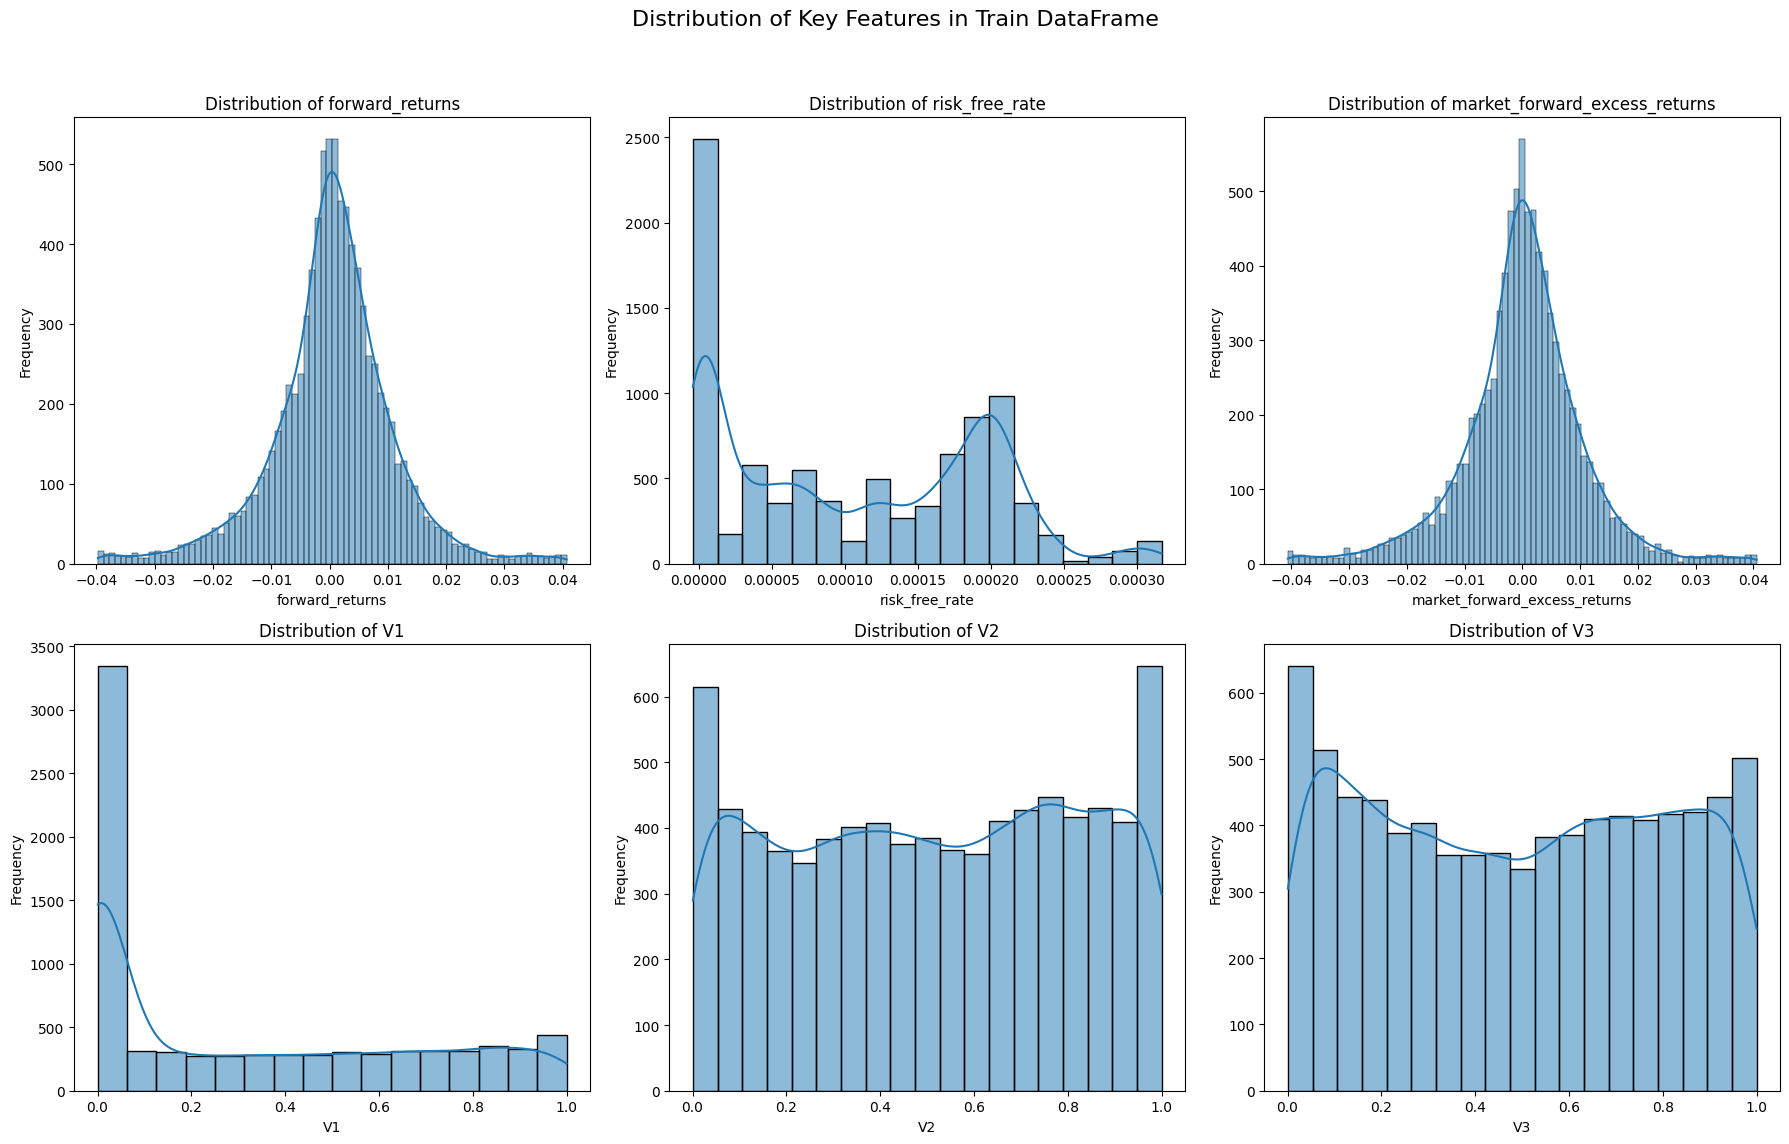

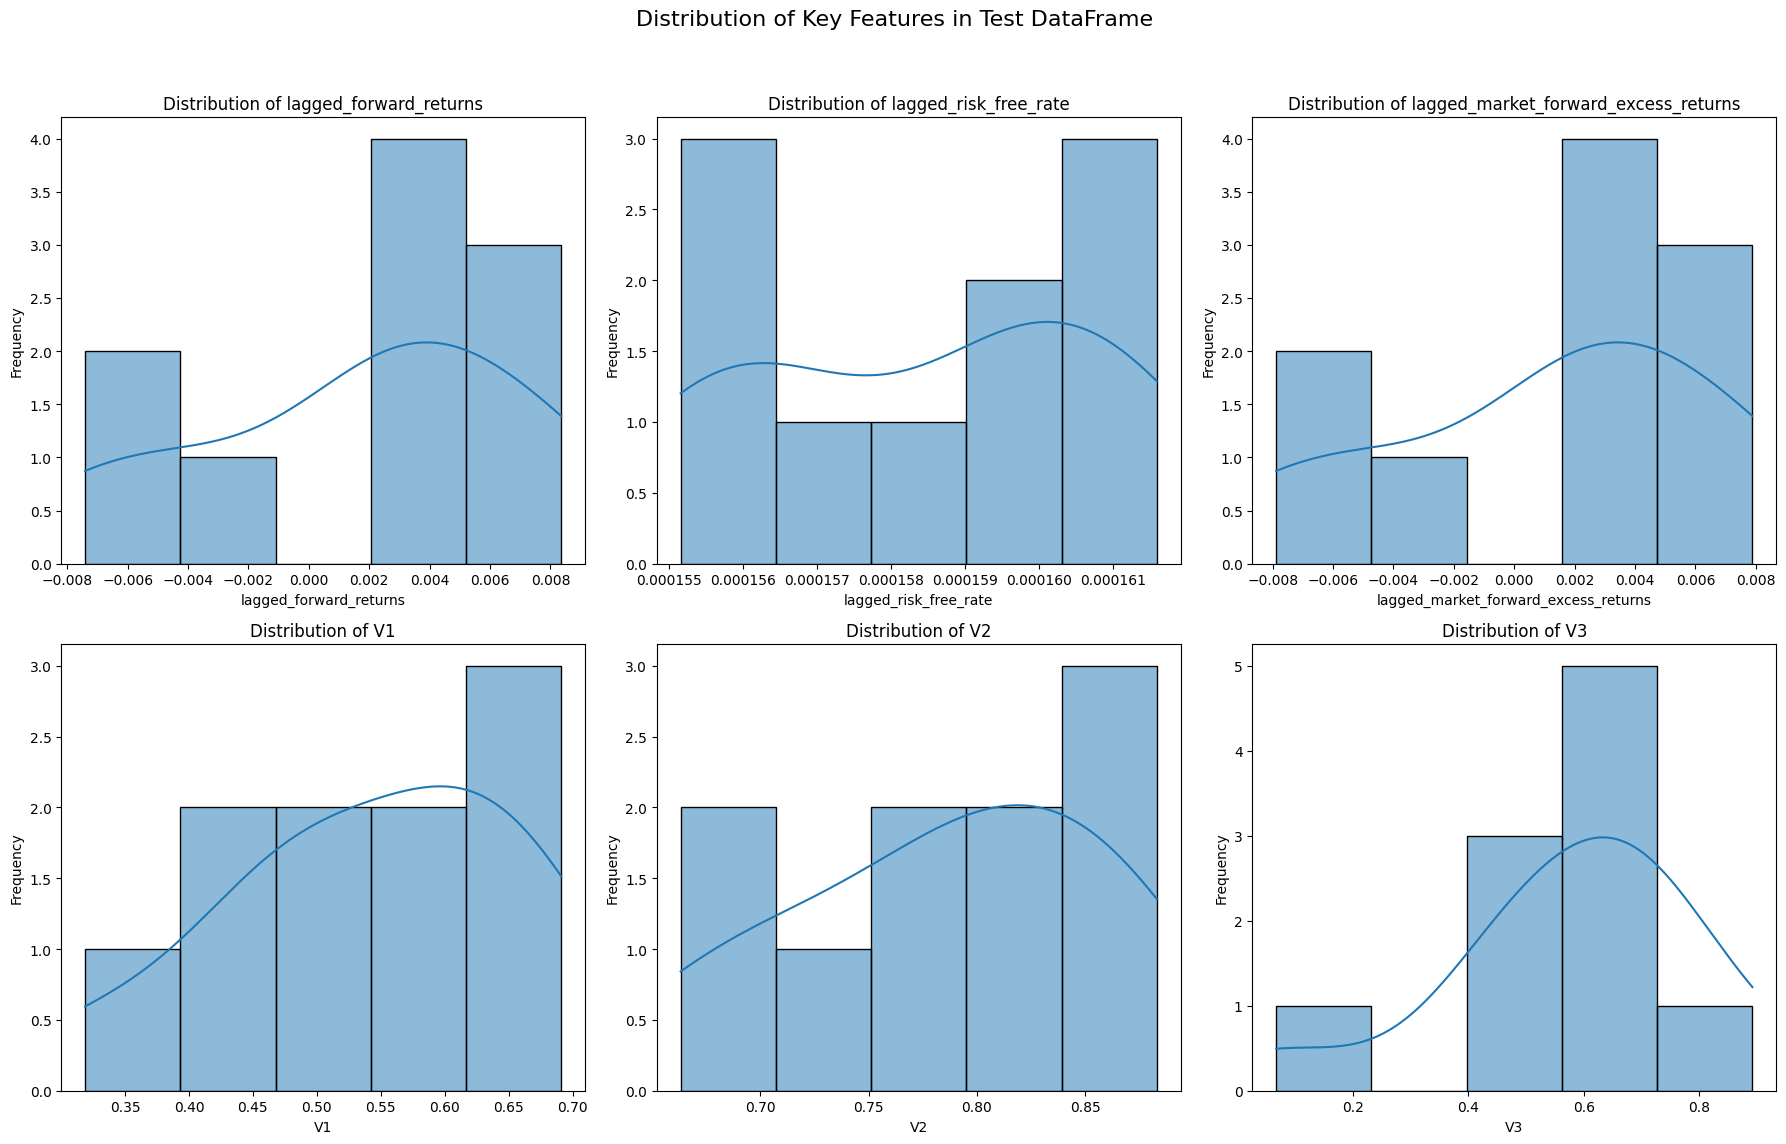

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize for train_df
train_features = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns', 'V1', 'V2', 'V3']

plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Key Features in Train DataFrame', fontsize=16)

for i, col in enumerate(train_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Features to visualize for test_df
test_features = ['lagged_forward_returns', 'lagged_risk_free_rate', 'lagged_market_forward_excess_returns', 'V1', 'V2', 'V3']

plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Key Features in Test DataFrame', fontsize=16)

for i, col in enumerate(test_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(test_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Pra-pemrosesan Data

### Subtask:
Bersihkan dan pra-proses data, termasuk menangani nilai yang hilang, mengkodekan fitur kategorikal, dan menskalakan fitur numerik jika diperlukan.


**Reasoning**:
To handle missing values, I will identify columns with missing values in `train_df`, calculate their medians, and then impute the missing values in both `train_df` and `test_df` using these calculated medians from `train_df` to maintain consistency. Finally, I'll verify the imputation by checking for any remaining missing values.



In [ ]:
missing_cols_train = train_df.columns[train_df.isnull().any()].tolist()

print("Columns with missing values in train_df before imputation:")
print(train_df[missing_cols_train].isnull().sum()[train_df[missing_cols_train].isnull().sum() > 0])

# Calculate medians from train_df
medians = train_df[missing_cols_train].median()

# Impute missing values in train_df with calculated medians
train_df[missing_cols_train] = train_df[missing_cols_train].fillna(medians)

# Impute missing values in test_df with medians calculated from train_df
# Note: Some columns in test_df might not have been present in train_df missing_cols_train
# Or test_df might have columns that are not in train_df that need imputation
# We will only impute columns present in missing_cols_train and also in test_df

missing_cols_test_actual = test_df.columns[test_df.isnull().any()].tolist()

# Find common missing columns in test_df that were also in train_df's missing list
common_missing_cols = list(set(missing_cols_train) & set(missing_cols_test_actual))

# Impute test_df using medians from train_df for the common columns
for col in common_missing_cols:
    if col in medians.index:
        test_df[col] = test_df[col].fillna(medians[col])

# Verify no missing values in train_df
print("\nMissing values in Train DataFrame after imputation:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

# Verify no missing values in test_df (only for columns that had missing values before and were imputed)
print("\nMissing values in Test DataFrame after imputation:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Columns with missing values in train_df before imputation:
E1     1784
E10    1006
E11    1006
E12    1006
E13    1006
       ... 
V5     1512
V6     1006
V7     1511
V8     1006
V9     4539
Length: 85, dtype: int64

Missing values in Train DataFrame after imputation:
Series([], dtype: int64)

Missing values in Test DataFrame after imputation:
Series([], dtype: int64)


**Reasoning**:
The next step in preprocessing is to handle the boolean column `is_scored` in `test_df` by converting it to integer (0 or 1), and then identify numerical features for scaling. Scaling numerical features is essential for many machine learning algorithms. I will use `StandardScaler` by fitting it only on the training data's numerical features and then transforming both the training and test sets to avoid data leakage.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Convert 'is_scored' column in test_df from boolean to integer
if 'is_scored' in test_df.columns and test_df['is_scored'].dtype == 'bool':
    test_df['is_scored'] = test_df['is_scored'].astype(int)
    print("Converted 'is_scored' column in test_df to int.")

# Identify numerical columns for scaling
# Exclude 'date_id' and 'D' columns (which are binary/categorical) from scaling
# Exclude target-related columns from train_df from feature scaling
d_cols = [f'D{i}' for i in range(1, 10)]
excluded_train_cols = ['date_id'] + d_cols + ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
excluded_test_cols = ['date_id'] + d_cols # 'is_scored' is now int, so it won't be picked by select_dtypes('float64')

# Select float columns that are not excluded
numerical_cols_train = train_df.select_dtypes(include=['float64']).columns.drop(excluded_train_cols, errors='ignore').tolist()
numerical_cols_test = test_df.select_dtypes(include=['float64']).columns.drop(excluded_test_cols, errors='ignore').tolist()

# Ensure that only columns common to both lists are used, and that they exist in both dataframes
common_numerical_cols = list(set(numerical_cols_train) & set(numerical_cols_test))

print(f"\nNumerical columns to be scaled: {common_numerical_cols[:5]}...") # Print first 5 for brevity

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data's numerical columns
scaler.fit(train_df[common_numerical_cols])

# Transform both training and test data using the fitted scaler
train_df[common_numerical_cols] = scaler.transform(train_df[common_numerical_cols])
test_df[common_numerical_cols] = scaler.transform(test_df[common_numerical_cols])

print("\nNumerical features scaled successfully in both train_df and test_df.")

# Display descriptive statistics for scaled columns in train_df to verify scaling
print("\nDescriptive statistics for scaled numerical features in Train DataFrame (first 5 columns):")
print(train_df[common_numerical_cols].describe().iloc[:, :5])

# Display descriptive statistics for scaled columns in test_df to verify scaling
print("\nDescriptive statistics for scaled numerical features in Test DataFrame (first 5 columns):")
print(test_df[common_numerical_cols].describe().iloc[:, :5])

Converted 'is_scored' column in test_df to int.

Numerical columns to be scaled: ['E12', 'S8', 'S1', 'P9', 'V10']...

Numerical features scaled successfully in both train_df and test_df.

Descriptive statistics for scaled numerical features in Train DataFrame (first 5 columns):
                E12            S8            S1            P9           V10
count  9.021000e+03  9.021000e+03  9.021000e+03  9.021000e+03  9.021000e+03
mean  -3.780740e-17  1.260247e-17 -4.725924e-17  2.520493e-17 -9.924441e-17
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00
min   -4.390375e-01 -4.473042e+00 -1.589033e+00 -1.005921e+00 -1.647492e+00
25%   -4.252408e-01 -2.841138e-01 -7.211148e-01 -8.623824e-01 -1.730223e-01
50%   -4.128239e-01  1.944972e-01 -2.443889e-01 -4.802109e-01 -1.730223e-01
75%   -2.348476e-01  5.549827e-01  4.295995e-01  1.114862e+00 -1.730223e-01
max    3.730300e+00  2.371781e+00  4.763468e+00  1.705164e+00  1.769127e+01

Descriptive statistics for scaled nu

## Pilih dan Latih Model

### Subtask:
Pilih model pembelajaran mesin yang sesuai (misalnya, Random Forest, Gradient Boosting, atau XGBoost) berdasarkan karakteristik data dan latih model menggunakan data pelatihan yang telah diproses. Pertimbangkan untuk menggunakan teknik validasi silang untuk pelatihan yang lebih robust.


**Reasoning**:
The first instruction is to separate the features (X) and the target variable (y) from the `train_df`. The target variable will be 'forward_returns', and the features will include all other columns except 'date_id', 'risk_free_rate', and 'market_forward_excess_returns' to avoid data leakage and use appropriate inputs for the model.



In [ ]:
X = train_df.drop(columns=['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'])
y = train_df['forward_returns']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"First 5 rows of target (y):\n{y.head()}")

Shape of features (X): (9021, 94)
Shape of target (y): (9021,)
First 5 rows of target (y):
0   -0.002421
1   -0.008495
2   -0.009624
3    0.004662
4   -0.011686
Name: forward_returns, dtype: float64


**Reasoning**:
Following the instructions, I will initialize a `RandomForestRegressor` model, train it with the prepared `X` and `y` data, and then perform cross-validation using `KFold` to evaluate its performance with RMSE, printing the mean score.



In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
print("Training RandomForestRegressor model...")
model.fit(X, y)
print("Model training complete.")

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate negative RMSE scores (cross_val_score returns negative scores for metrics where higher is better)
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))

print(f"\nCross-validation RMSE scores: {rmse_scores}")
print(f"Average Cross-validation RMSE: {np.mean(rmse_scores):.4f}")

Training RandomForestRegressor model...


NameError: name 'X' is not defined

In [5]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("First 5 rows of train_df:")
print(train_df.head())

print("\nFirst 5 rows of test_df:")
print(test_df.head())

First 5 rows of train_df:
   date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...  V3  V4  V5  V6  V7  V8  \
0        0   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
1        1   0   0   0   1   1   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
2        2   0   0   0   1   0   0   0   0   1  ... NaN NaN NaN NaN NaN NaN   
3        3   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   
4        4   0   0   0   1   0   0   0   0   0  ... NaN NaN NaN NaN NaN NaN   

   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0 NaN        -0.002421        0.000301                      -0.003038  
1 NaN        -0.008495        0.000303                      -0.009114  
2 NaN        -0.009624        0.000301                      -0.010243  
3 NaN         0.004662        0.000299                       0.004046  
4 NaN        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]

First 5 rows of test_df:
   date_id  D1  D2

In [6]:
missing_cols_train = train_df.columns[train_df.isnull().any()].tolist()

print("Columns with missing values in train_df before imputation:")
print(train_df[missing_cols_train].isnull().sum()[train_df[missing_cols_train].isnull().sum() > 0])

# Calculate medians from train_df
medians = train_df[missing_cols_train].median()

# Impute missing values in train_df with calculated medians
train_df[missing_cols_train] = train_df[missing_cols_train].fillna(medians)

# Impute missing values in test_df with medians calculated from train_df
# Note: Some columns in test_df might not have been present in train_df missing_cols_train
# Or test_df might have columns that are not in train_df that need imputation
# We will only impute columns present in missing_cols_train and also in test_df

missing_cols_test_actual = test_df.columns[test_df.isnull().any()].tolist()

# Find common missing columns in test_df that were also in train_df's missing list
common_missing_cols = list(set(missing_cols_train) & set(missing_cols_test_actual))

# Impute test_df using medians from train_df for the common columns
for col in common_missing_cols:
    if col in medians.index:
        test_df[col] = test_df[col].fillna(medians[col])

# Verify no missing values in train_df
print("\nMissing values in Train DataFrame after imputation:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

# Verify no missing values in test_df (only for columns that had missing values before and were imputed)
print("\nMissing values in Test DataFrame after imputation:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Columns with missing values in train_df before imputation:
E1     1784
E10    1006
E11    1006
E12    1006
E13    1006
       ... 
V5     1512
V6     1006
V7     1511
V8     1006
V9     4539
Length: 85, dtype: int64

Missing values in Train DataFrame after imputation:
Series([], dtype: int64)

Missing values in Test DataFrame after imputation:
Series([], dtype: int64)


In [7]:
from sklearn.preprocessing import StandardScaler

# Convert 'is_scored' column in test_df from boolean to integer
if 'is_scored' in test_df.columns and test_df['is_scored'].dtype == 'bool':
    test_df['is_scored'] = test_df['is_scored'].astype(int)
    print("Converted 'is_scored' column in test_df to int.")

# Identify numerical columns for scaling
# Exclude 'date_id' and 'D' columns (which are binary/categorical) from scaling
# Exclude target-related columns from train_df from feature scaling
d_cols = [f'D{i}' for i in range(1, 10)]
excluded_train_cols = ['date_id'] + d_cols + ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
excluded_test_cols = ['date_id'] + d_cols # 'is_scored' is now int, so it won't be picked by select_dtypes('float64')

# Select float columns that are not excluded
numerical_cols_train = train_df.select_dtypes(include=['float64']).columns.drop(excluded_train_cols, errors='ignore').tolist()
numerical_cols_test = test_df.select_dtypes(include=['float64']).columns.drop(excluded_test_cols, errors='ignore').tolist()

# Ensure that only columns common to both lists are used, and that they exist in both dataframes
common_numerical_cols = list(set(numerical_cols_train) & set(numerical_cols_test))

print(f"\nNumerical columns to be scaled: {common_numerical_cols[:5]}...") # Print first 5 for brevity

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data's numerical columns
scaler.fit(train_df[common_numerical_cols])

# Transform both training and test data using the fitted scaler
train_df[common_numerical_cols] = scaler.transform(train_df[common_numerical_cols])
test_df[common_numerical_cols] = scaler.transform(test_df[common_numerical_cols])

print("\nNumerical features scaled successfully in both train_df and test_df.")

# Display descriptive statistics for scaled columns in train_df to verify scaling
print("\nDescriptive statistics for scaled numerical features in Train DataFrame (first 5 columns):")
print(train_df[common_numerical_cols].describe().iloc[:, :5])

# Display descriptive statistics for scaled numerical features in Test DataFrame (first 5 columns):")
print(test_df[common_numerical_cols].describe().iloc[:, :5])

Converted 'is_scored' column in test_df to int.

Numerical columns to be scaled: ['E9', 'E6', 'I8', 'V9', 'M6']...

Numerical features scaled successfully in both train_df and test_df.

Descriptive statistics for scaled numerical features in Train DataFrame (first 5 columns):
                 E9            E6            I8           V9            M6
count  9.021000e+03  9.021000e+03  9.021000e+03  9021.000000  9.021000e+03
mean  -1.512296e-16 -1.260247e-16  2.520493e-16     0.000000  4.410863e-17
std    1.000055e+00  1.000055e+00  1.000055e+00     1.000055  1.000055e+00
min   -8.572953e-01 -5.271276e-01 -1.872210e+00    -1.615963 -2.705190e+00
25%   -8.045670e-01 -4.565761e-01 -8.037984e-01    -0.164277 -1.781378e-01
50%   -4.950746e-01 -3.844569e-01  7.074797e-02    -0.164277 -1.781378e-01
75%    6.374380e-01 -9.754751e-02  9.259078e-01    -0.164277 -1.781378e-01
max    2.606726e+00  4.210796e+00  1.382567e+00    14.306121  1.390157e+01
              E9         E6         I8         V

In [8]:
X = train_df.drop(columns=['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'])
y = train_df['forward_returns']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"First 5 rows of target (y):\n{y.head()}")

Shape of features (X): (9021, 94)
Shape of target (y): (9021,)
First 5 rows of target (y):
0   -0.002421
1   -0.008495
2   -0.009624
3    0.004662
4   -0.011686
Name: forward_returns, dtype: float64


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler

# --- Data Loading ---
pd.set_option('display.max_columns', None)
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print("Data loaded successfully.")

# --- Missing Value Imputation ---
missing_cols_train = train_df.columns[train_df.isnull().any()].tolist()
medians = train_df[missing_cols_train].median()
train_df[missing_cols_train] = train_df[missing_cols_train].fillna(medians)

missing_cols_test_actual = test_df.columns[test_df.isnull().any()].tolist()
common_missing_cols = list(set(missing_cols_train) & set(missing_cols_test_actual))

for col in common_missing_cols:
    if col in medians.index:
        test_df[col] = test_df[col].fillna(medians[col])

print("Missing values imputed successfully.")

# --- Feature Scaling ---
if 'is_scored' in test_df.columns and test_df['is_scored'].dtype == 'bool':
    test_df['is_scored'] = test_df['is_scored'].astype(int)

d_cols = [f'D{i}' for i in range(1, 10)]
excluded_train_cols = ['date_id'] + d_cols + ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
excluded_test_cols = ['date_id'] + d_cols

numerical_cols_train = train_df.select_dtypes(include=['float64']).columns.drop(excluded_train_cols, errors='ignore').tolist()
numerical_cols_test = test_df.select_dtypes(include=['float64']).columns.drop(excluded_test_cols, errors='ignore').tolist()

common_numerical_cols = list(set(numerical_cols_train) & set(numerical_cols_test))

scaler = StandardScaler()
scaler.fit(train_df[common_numerical_cols])

train_df[common_numerical_cols] = scaler.transform(train_df[common_numerical_cols])
test_df[common_numerical_cols] = scaler.transform(test_df[common_numerical_cols])

print("Numerical features scaled successfully.")

# --- Separate features (X) and target (y) ---
X = train_df.drop(columns=['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'])
y = train_df['forward_returns']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"First 5 rows of target (y):\n{y.head()}")

# --- Model Training and Cross-validation ---
model = RandomForestRegressor(random_state=42)

print("Training RandomForestRegressor model...")
model.fit(X, y)
print("Model training complete.")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Starting cross-validation...")
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
print("Cross-validation complete.")

print(f"\nCross-validation RMSE scores: {rmse_scores}")
print(f"Average Cross-validation RMSE: {np.mean(rmse_scores):.4f}")

Data loaded successfully.
Missing values imputed successfully.
Numerical features scaled successfully.
Shape of features (X): (4552, 94)
Shape of target (y): (4552,)
First 5 rows of target (y):
0   -0.002421
1   -0.008495
2   -0.009624
3    0.004662
4   -0.011686
Name: forward_returns, dtype: float64
Training RandomForestRegressor model...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Model training complete.
Starting cross-validation...
Cross-validation complete.

Cross-validation RMSE scores: [0.00971735 0.01005426 0.01004948 0.01061197 0.01037298]
Average Cross-validation RMSE: 0.0102


In [12]:
import os

files_in_content = os.listdir('/content/')

print("Files in /content/ directory:")
for f in files_in_content:
    print(f)

if 'train.csv' in files_in_content:
    print("\n'train.csv' found in /content/")
else:
    print("\n'train.csv' NOT found in /content/")

if 'test.csv' in files_in_content:
    print("'test.csv' found in /content/")
else:
    print("'test.csv' NOT found in /content/")

Files in /content/ directory:
.config
test.csv
train.csv
sample_data

'train.csv' found in /content/
'test.csv' found in /content/


In [9]:
X = train_df.drop(columns=['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'])
y = train_df['forward_returns']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")
print(f"First 5 rows of target (y):\n{y.head()}")

NameError: name 'train_df' is not defined

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
print("Training RandomForestRegressor model...")
model.fit(X, y)
print("Model training complete.")

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate negative RMSE scores (cross_val_score returns negative scores for metrics where higher is better)
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))

print(f"\nCross-validation RMSE scores: {rmse_scores}")
print(f"Average Cross-validation RMSE: {np.mean(rmse_scores):.4f}")

Training RandomForestRegressor model...


NameError: name 'X' is not defined